In [2]:
import geopandas as gpd
from shapely.geometry import Point

In [3]:
# load NG raw buses data
ng_buses = gpd.read_file("/home/matin/Downloads/all_raw_substations.geojson")
ng_lines = gpd.read_file("/home/matin/Downloads/all_raw_lines.geojson")
distance_crs = "EPSG:3857"
tol = 5000



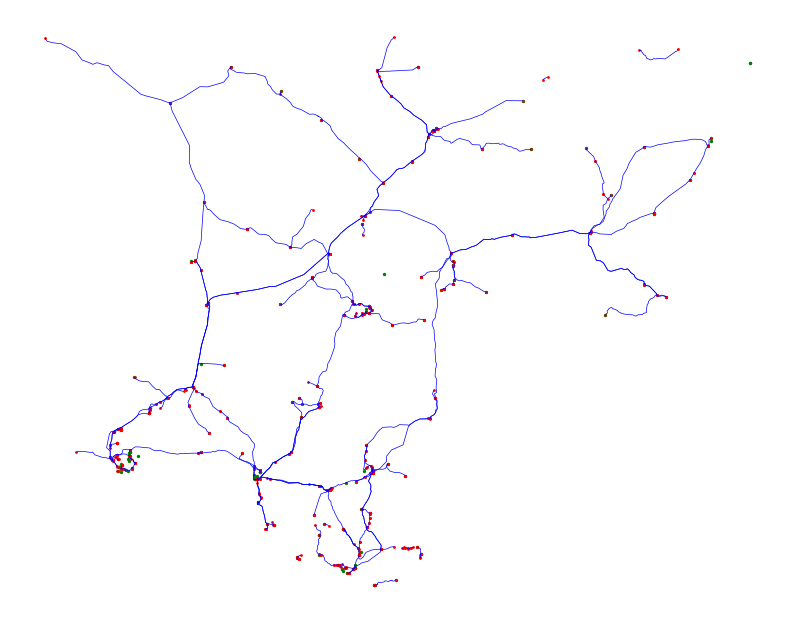

In [4]:
# plot buses and lines on the same map
import matplotlib.pyplot as plt
ax = ng_buses.plot(figsize=(10, 10), color='green', markersize=2)
ng_lines.plot(ax=ax, color='blue', linewidth=0.5)
# plot start and end points of lines
ng_lines_start = ng_lines.copy()
ng_lines_start.geometry = ng_lines_start.geometry.apply(lambda x: Point(x.coords[0]))
ng_lines_start.plot(ax=ax, color='red', markersize=1)
ng_lines_end = ng_lines.copy()
ng_lines_end.geometry = ng_lines_end.geometry.apply(lambda x: Point(x.coords[-1]))
ng_lines_end.plot(ax=ax, color='red', markersize=1)
ax.set_axis_off()
plt.show()



In [13]:
from shapely.ops import split

df_l = ng_lines.copy()
df_p = ng_buses.copy()

tolerance = 0.0001
    
# Buffer points to create areas for spatial join 
buffer_df = gpd.GeoDataFrame(geometry=df_p.buffer(tolerance))
    
# Spatial join to find lines intersecting point buffers
joined = gpd.sjoin(df_l, buffer_df, how="inner", op='intersects')
    
# Group by line index to handle multiparts
grouped = joined.groupby('index_right')
    
# Split lines and explode multilinestrings      
splits = []
for idx, group in grouped:
    line = df_l.loc[idx, 'geometry']
    for pt_buff in group['geometry']:
        if line.intersects(pt_buff):
            try:
                splits.extend(split(line, pt_buff))
            except Exception as e:
                print(e)
                continue
        
# Create new geodataframe and replace original lines    
splits_gdf = gpd.GeoDataFrame(geometry=splits)
df_l.loc[splits_gdf.index, 'geometry'] = splits_gdf['geometry']
    

/tmp/ipykernel_196422/1254052764.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_df = gpd.GeoDataFrame(geometry=df_p.buffer(tolerance))
/home/matin/PRs/pypsa-africa/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [14]:
df_l

,id,tags.power,Type,Country,Length,tags.cables,tags.voltage,tags.circuits,tags.frequency,geometry
0,1.078669e+08,line,Way,NG,102923.431368,3,330000,NaN,NaN,"LINESTRING (3.85501 7.37162, 3.85481 7.37145, ..."
1,1.080210e+08,line,Way,NG,29168.300060,3,330000,NaN,NaN,"LINESTRING (3.24623 6.60354, 3.24581 6.60399, ..."
2,1.373071e+08,line,Way,NG,12636.275778,NaN,33000,NaN,NaN,"LINESTRING (7.29623 5.17632, 7.32234 5.09276, ..."
3,2.154595e+08,line,Way,NG,250.565169,6,330000,NaN,50,"LINESTRING (6.65715 7.47082, 6.65533 7.47102, ..."
4,2.154596e+08,line,Way,NG,58.567306,3,NaN,NaN,NaN,"LINESTRING (6.65495 7.47203, 6.65491 7.47196, ..."
...,...,...,...,...,...,...,...,...,...,...
638,1.124414e+09,line,Way,NG,1520.688152,6,NaN,NaN,NaN,"LINESTRING (3.33618 6.61761, 3.33705 6.61716, ..."
639,1.124414e+09,line,Way,NG,152.173734,NaN,NaN,NaN,NaN,"LINESTRING (3.33583 6.61799, 3.33580 6.61839, ..."
640,1.124414e+09,line,Way,NG,6858.423191,3,NaN,NaN,NaN,"LINESTRING (3.33595 6.61800, 3.33591 6.61840, ..."
641,1.124414e+09,line,Way,NG,2730.112843,6,NaN,NaN,NaN,"LINESTRING (3.33569 6.61866, 3.33539 6.62381, ..."


In [15]:
joined

,id,tags.power,Type,Country,Length,tags.cables,tags.voltage,tags.circuits,tags.frequency,geometry,index_right
14,2.164994e+08,line,Way,NG,109.275777,3,NaN,NaN,NaN,"LINESTRING (6.65821 7.47055, 6.65813 7.47041, ...",170
130,5.466663e+08,line,Way,NG,280.280690,NaN,NaN,NaN,NaN,"LINESTRING (5.64284 5.92629, 5.64297 5.92604, ...",42
235,5.644661e+08,line,Way,NG,20325.383541,NaN,132000,NaN,NaN,"LINESTRING (8.87386 9.48092, 8.87242 9.48095, ...",87
244,5.647256e+08,line,Way,NG,27.206258,NaN,NaN,NaN,NaN,"LINESTRING (8.87407 9.48103, 8.87382 9.48102)",87
239,5.644694e+08,line,Way,NG,42.266918,NaN,132000,NaN,NaN,"LINESTRING (8.89467 9.54466, 8.89430 9.54455)",88
243,5.644734e+08,line,Way,NG,97.801034,NaN,132000,NaN,NaN,"LINESTRING (8.86458 9.78346, 8.86438 9.78261)",136
349,5.736755e+08,line,Way,NG,93.305512,NaN,NaN,NaN,NaN,"LINESTRING (7.50740 9.09167, 7.50809 9.09213)",133
353,5.736755e+08,line,Way,NG,62.988663,NaN,NaN,NaN,NaN,"LINESTRING (7.50796 9.09169, 7.50740 9.09167)",133
419,5.921916e+08,line,Way,NG,22.640958,NaN,NaN,NaN,NaN,"LINESTRING (3.39588 6.52109, 3.39606 6.52100)",140
420,5.921916e+08,line,Way,NG,26.123578,NaN,NaN,NaN,NaN,"LINESTRING (3.39588 6.52109, 3.39606 6.52094)",140


In [17]:
len(joined)

16

In [12]:
df_p

,id,tags.power,Type,Country,Area,tags.substation,tags.voltage,geometry
0,2000011529,substation,Node,NG,NaN,NaN,NaN,POINT (5.58060 6.35724)
1,2075846568,substation,Node,NG,NaN,NaN,NaN,POINT (5.62399 6.32237)
2,2161110201,substation,Node,NG,NaN,NaN,NaN,POINT (5.60758 6.31436)
3,2161110983,substation,Node,NG,NaN,NaN,NaN,POINT (5.62487 6.32611)
4,2161121796,substation,Node,NG,NaN,NaN,NaN,POINT (5.60564 6.29269)
...,...,...,...,...,...,...,...,...
183,1072428088,substation,Way,NG,6790.0,NaN,NaN,POINT (7.03496 4.83221)
184,1072428089,substation,Way,NG,5110.0,NaN,NaN,POINT (7.03539 4.83086)
185,1085422075,substation,Way,NG,12590.0,NaN,NaN,POINT (5.37793 6.71533)
186,1120308268,substation,Way,NG,5770.0,NaN,NaN,POINT (3.34876 6.49528)
